In [81]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

#load the data
car=pd.read_csv("Downloads/MLR/MLR/ToyotaCorolla - MLR.csv")
print(car.columns)


Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [15]:
#Exploratory DataSet
print("Total missing Values in the car dataset:",car.isna().sum().sum())
#check categorical data
categorical=car.select_dtypes(exclude=['int',float])

Total missing Values in the car dataset: 0


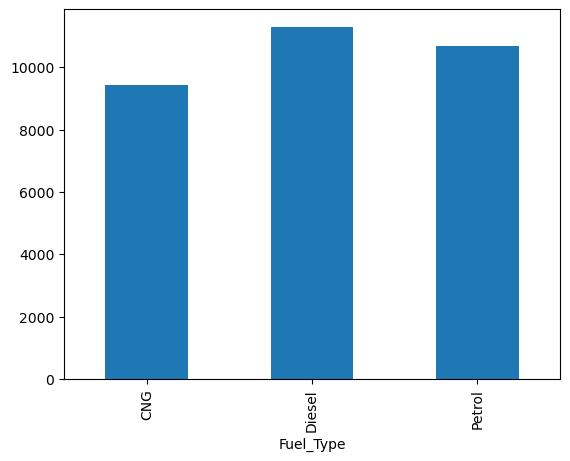

In [17]:
#relationship between categorical data with other variable
for k in categorical:
    if k!="Price":
        car.groupby([k])["Price"].mean().plot.bar()
        plt.show()

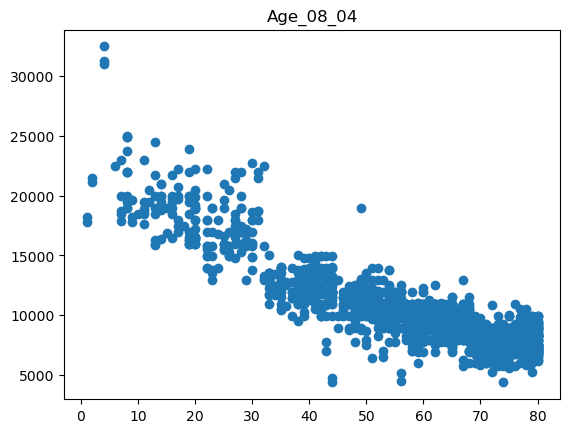

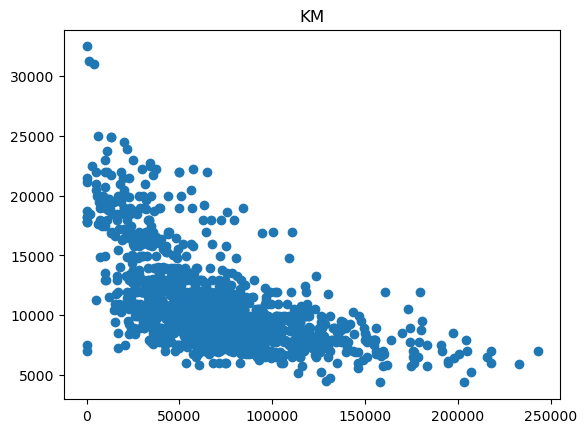

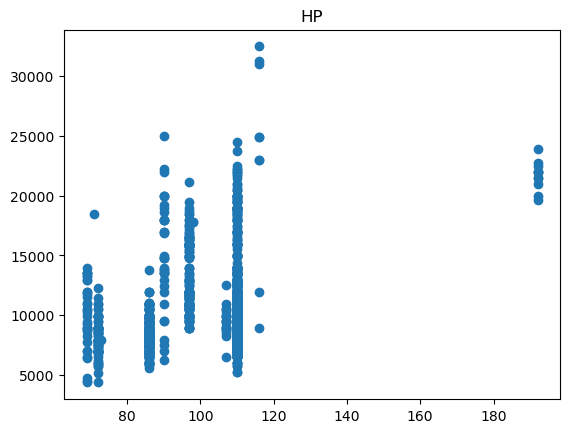

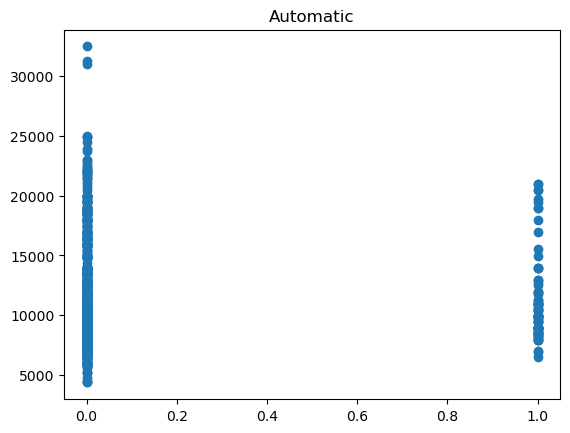

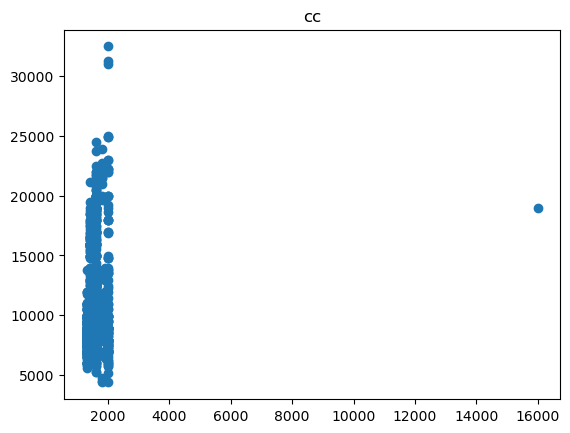

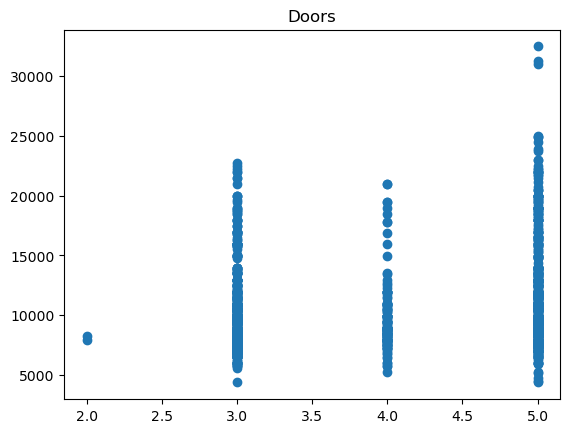

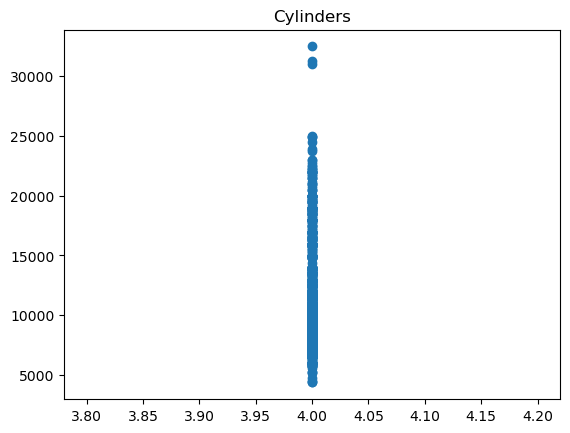

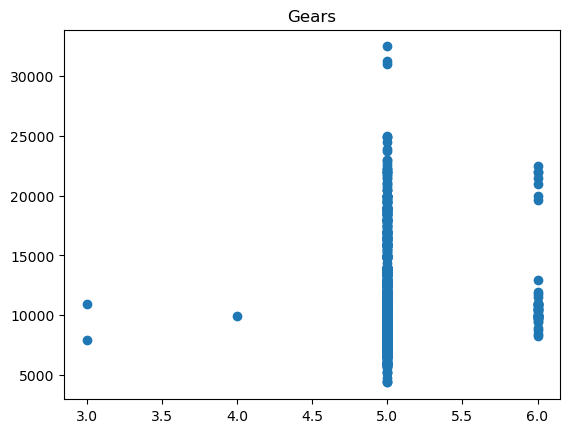

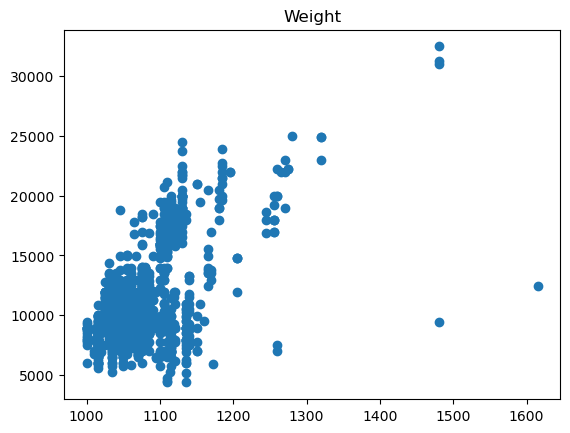

In [19]:
#plot scatterplot against numerical variable
num=car.select_dtypes(exclude=["object"])
for k in num:
    if k!="Price":
        plt.scatter(car[k],car["Price"])
        plt.title(k)
        plt.show()

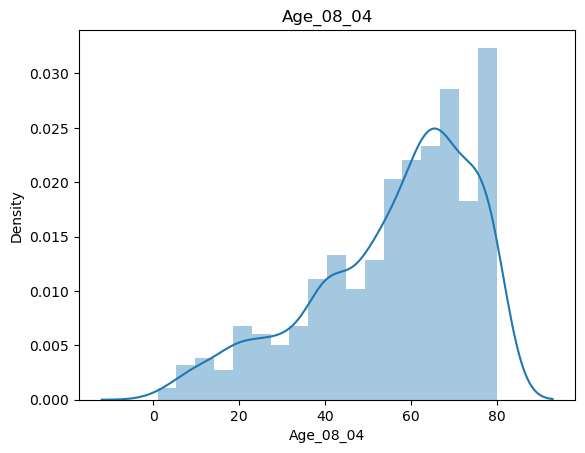

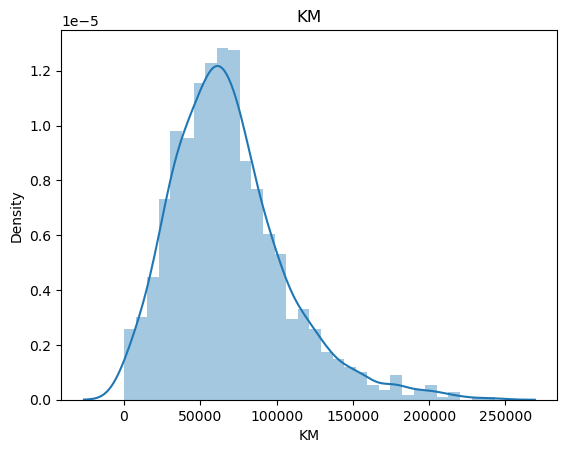

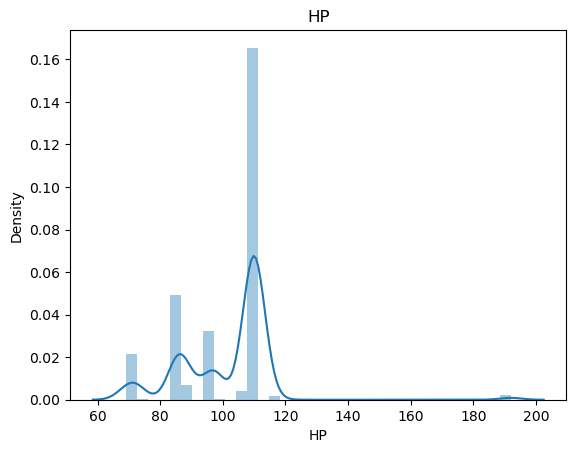

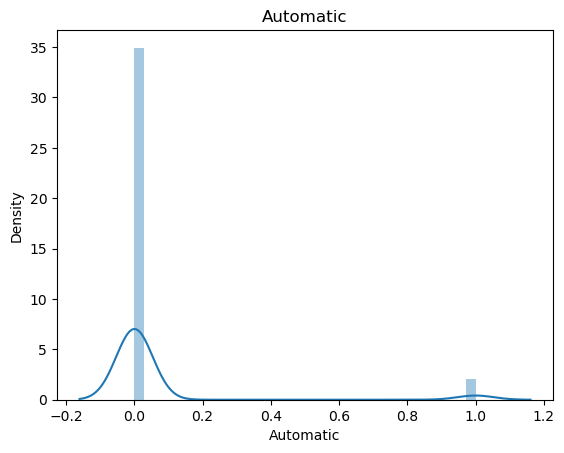

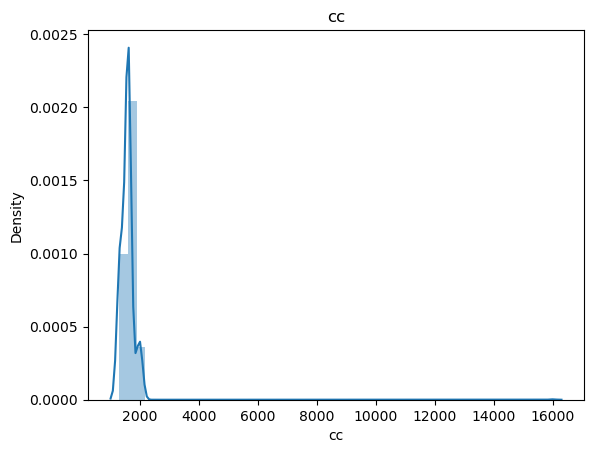

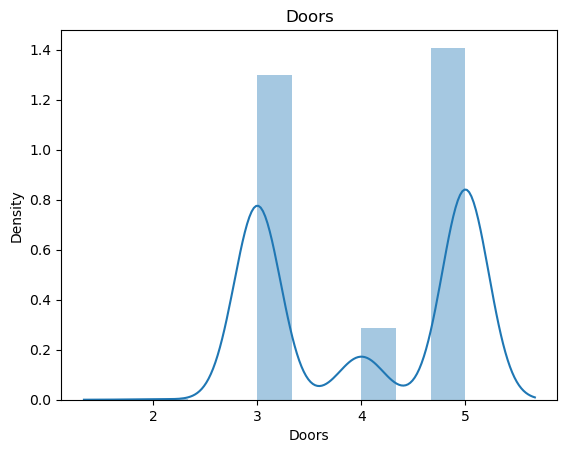

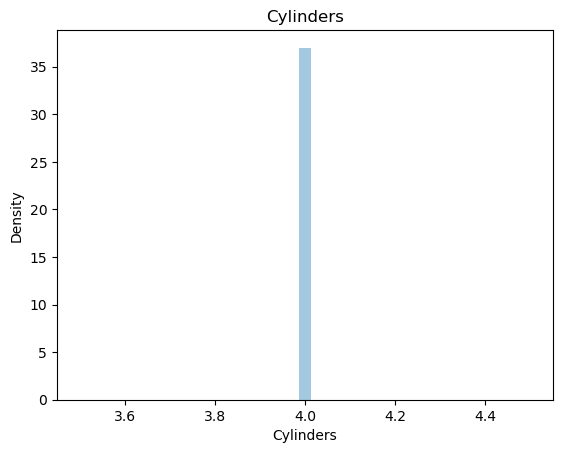

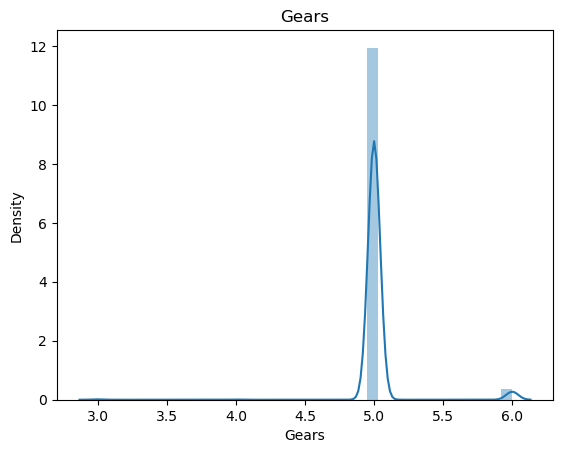

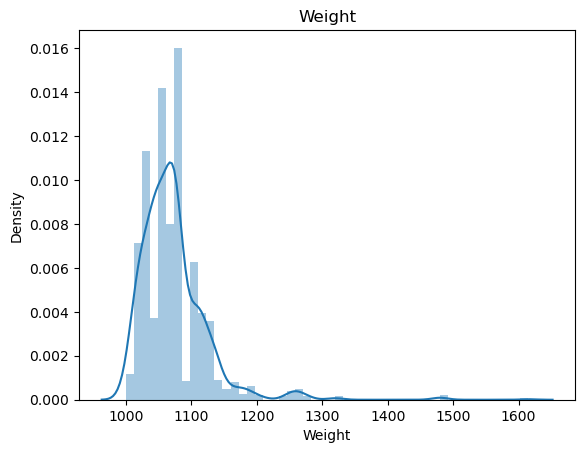

In [21]:
#Linear Regression assume that the input data is symmetrically distributed
import warnings
warnings.filterwarnings("ignore")
for k in num:
    if k!="Price":
        sns.distplot(car[k])
        plt.title(k)
        plt.show()

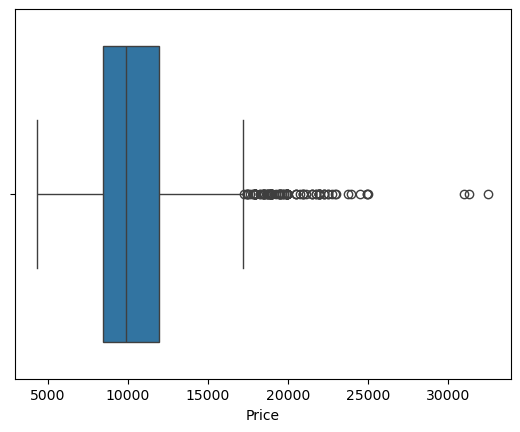

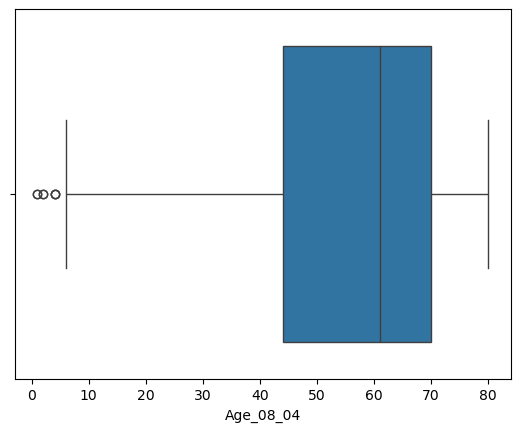

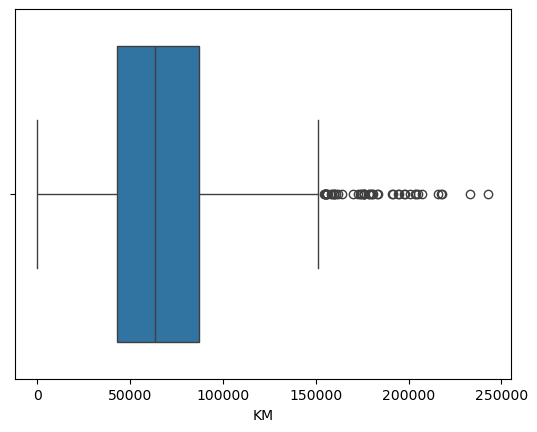

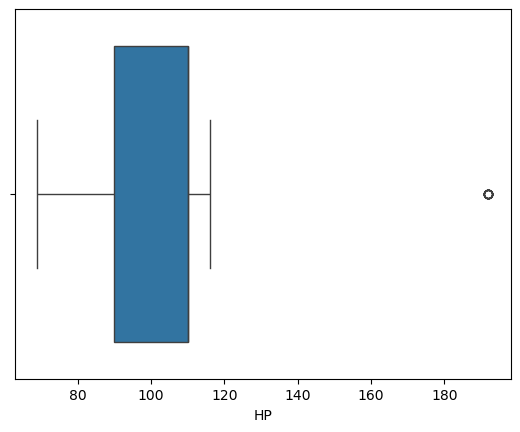

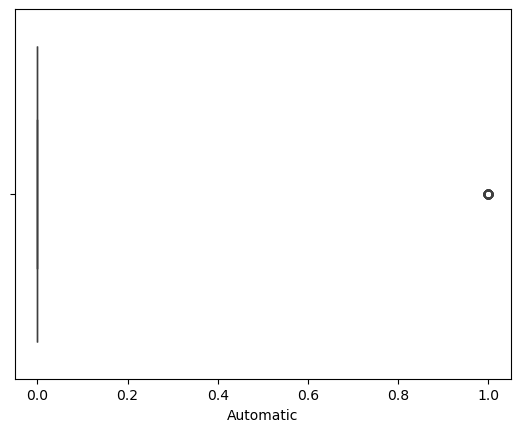

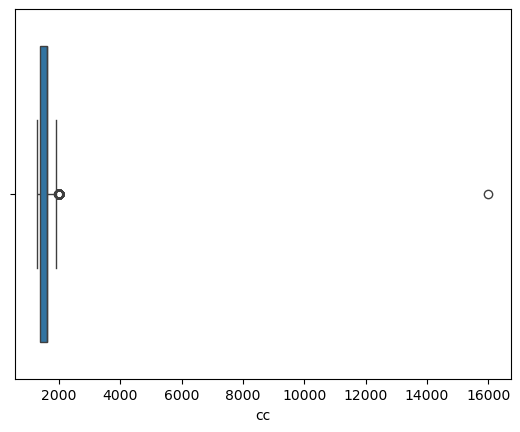

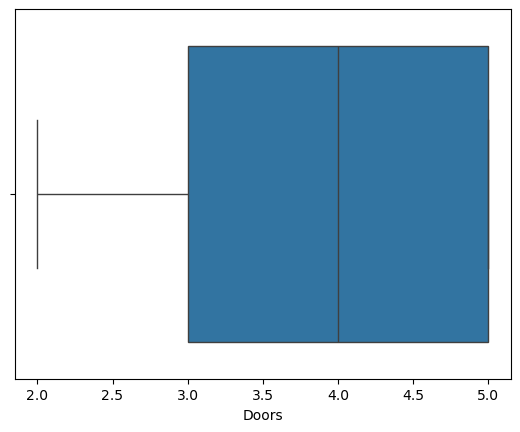

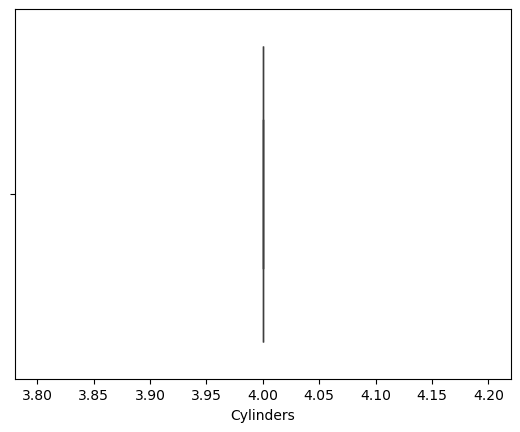

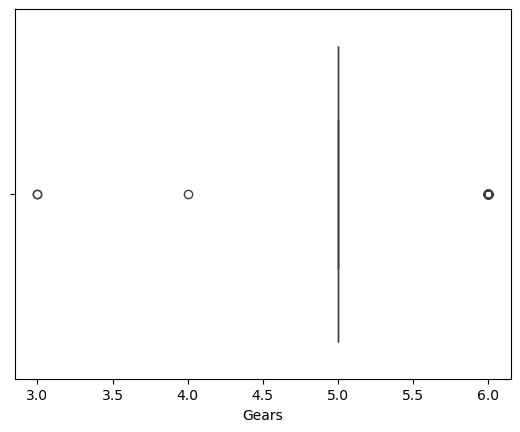

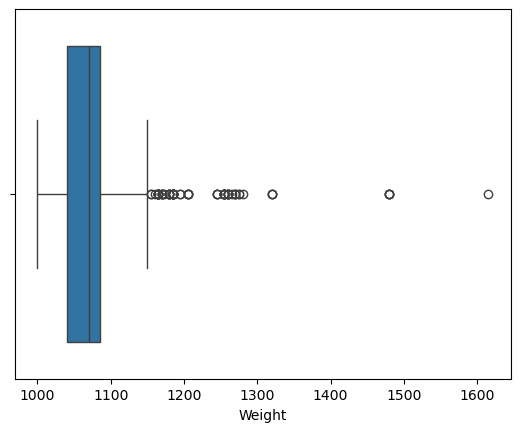

In [23]:
#check outlier using boxplot
import warnings
warnings.filterwarnings("ignore")
for i in car.select_dtypes(include="number").columns:
    sns.boxplot(data=car,x=i)
    plt.show()      


In [25]:
#Treatment for outliers/boxplot capping 
def remove_outlier(col):
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    lowerbound=q1-(1.5*(IQR))
    upperbound=q3+(1.5*(IQR))
    return lowerbound,upperbound
for i in ['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight']:
    lower,upper=remove_outlier(car[i])
    car[i]=np.where(car[i]<lower,lower,car[i])
    car[i]=np.where(car[i]>upper,upper,car[i])

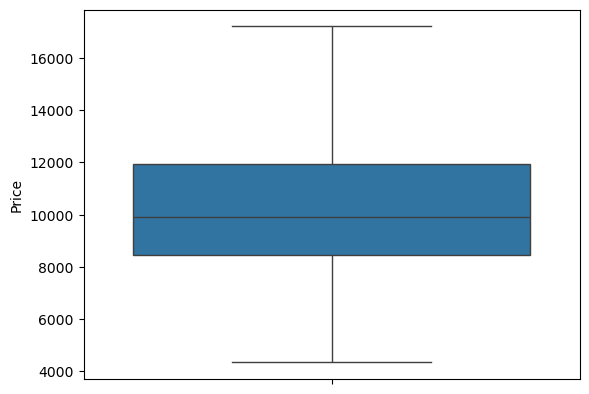

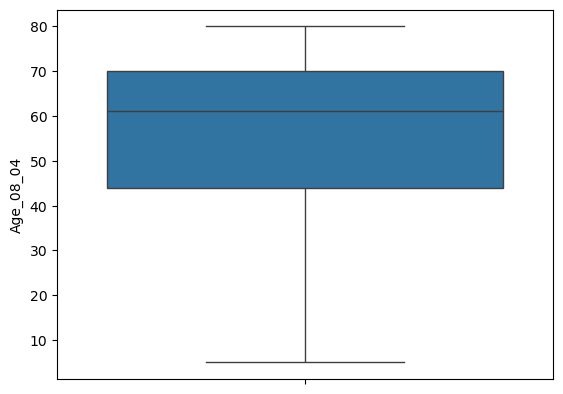

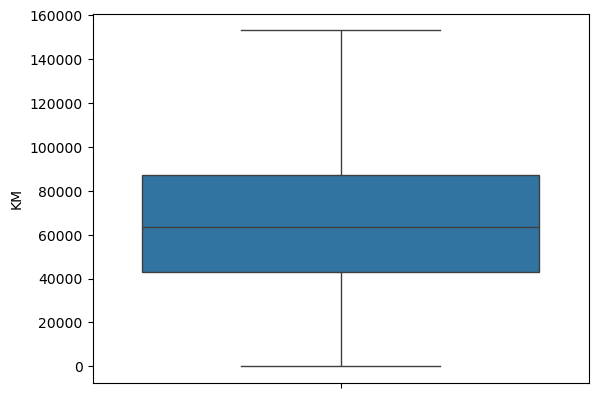

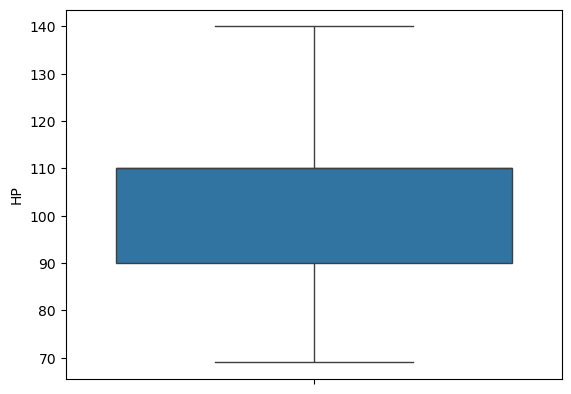

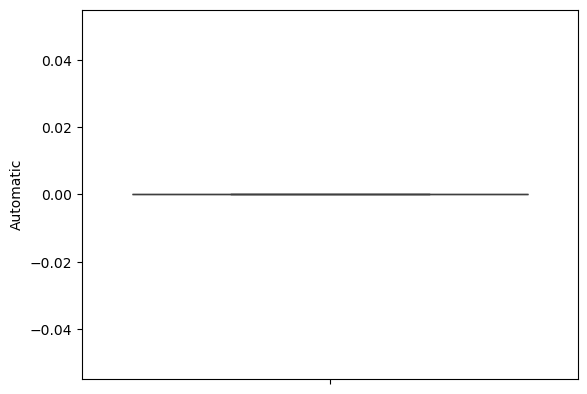

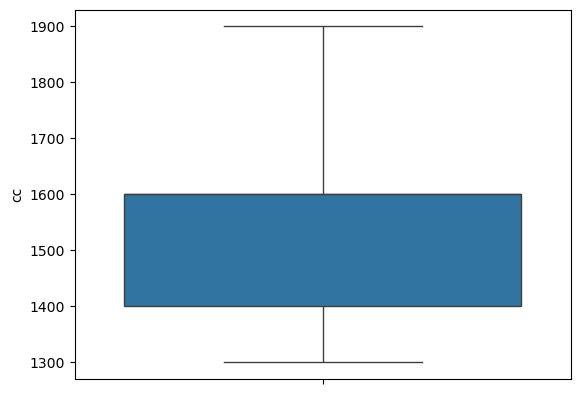

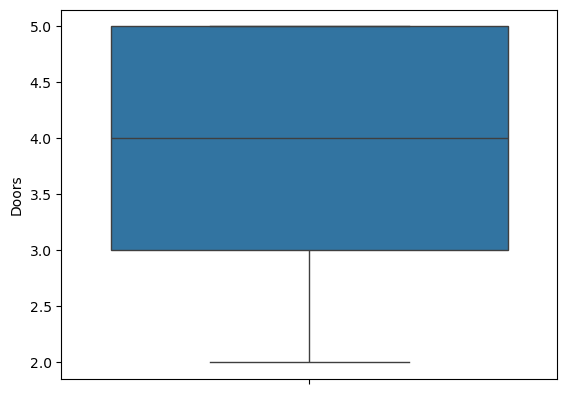

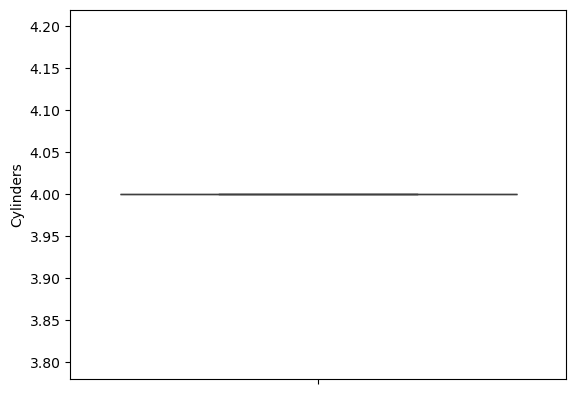

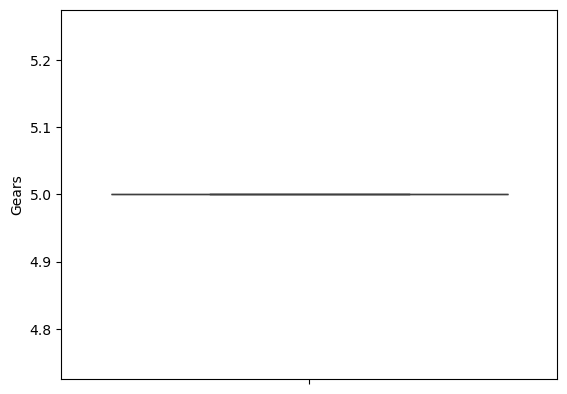

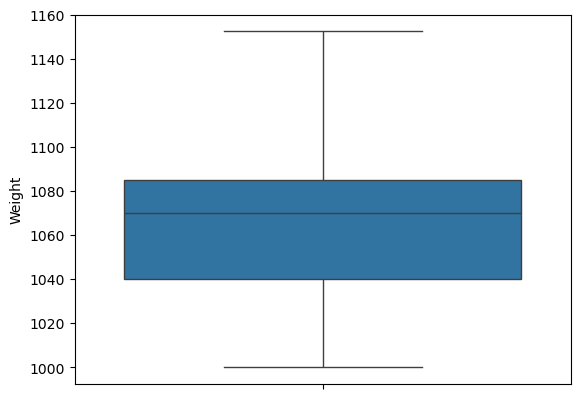

In [27]:
#box plot after capping LB Column
for i in ['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight']:
    sns.boxplot(car[i])
    plt.show()

In [29]:
#Feature Engineering
#convert the categorical variable into numerical variable
print("Categorical data in the car dataset:")
car[categorical.columns].head()

Categorical data in the car dataset:


,Fuel_Type
0,Diesel
1,Diesel
2,Diesel
3,Diesel
4,Diesel


In [140]:
ina=car.copy()
ordinal={k:i for i,k in enumerate(ina["Fuel_Type"].unique(),0)}
ina["Fuel_Type"]=ina["Fuel_Type"].map(ordinal)
print(ina[categorical.columns].head())
print(ina.columns)
print(ina.head())

   Fuel_Type
0          0
1          0
2          0
3          0
4          0
Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')
   Price  Age_08_04     KM  Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986          0  90          0  2000      3          4   
1  13750         23  72937          0  90          0  2000      3          4   
2  13950         24  41711          0  90          0  2000      3          4   
3  14950         26  48000          0  90          0  2000      3          4   
4  13750         30  38500          0  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


In [33]:
ina["Fuel_Type"].unique()

array([0, 1, 2], dtype=int64)

In [35]:
#all the categorical values are converted into numerical value
ina.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23.0,46986.0,0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
1,13750.0,23.0,72937.0,0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
2,13950.0,24.0,41711.0,0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
3,14950.0,26.0,48000.0,0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
4,13750.0,30.0,38500.0,0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5


In [43]:
#Feature Selection
#chi square used to find the relationship between categorical and continous
from sklearn.feature_selection import chi2
feature_categorical=ina[categorical.columns]
feature_categorical["Price"]=ina["Price"].values
y=ina["Price"].astype("int")
feature_categorical.head()

,Fuel_Type,Price
0,0,13500.0
1,0,13750.0
2,0,13950.0
3,0,14950.0
4,0,13750.0


In [45]:
chi=chi2(feature_categorical,y)
print(chi)

(array([3.00138644e+01, 1.21505916e+06]), array([1., 0.]))


In [47]:
#correlation is used to check the relationship between numerical variables
feature_number=ina.drop("Fuel_Type",axis=1)
print("The correlation value for numerical variables:")
feature_number.corr()

The correlation value for numerical variables:


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.895728,-0.608832,0.255640,NaN,0.132106,0.184211,NaN,NaN,0.509536
Age_08_04,-0.895728,1.000000,0.531839,-0.131284,NaN,-0.139771,-0.148137,NaN,NaN,-0.478225
KM,-0.608832,0.531839,1.000000,-0.330495,NaN,0.255855,-0.037677,NaN,NaN,-0.001489
HP,0.255640,-0.131284,-0.330495,1.000000,NaN,0.099605,0.120844,NaN,NaN,0.026578
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.132106,-0.139771,0.255855,0.099605,NaN,1.000000,0.139616,NaN,NaN,0.718655
Doors,0.184211,-0.148137,-0.037677,0.120844,NaN,0.139616,1.000000,NaN,NaN,0.381955
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.509536,-0.478225,-0.001489,0.026578,NaN,0.718655,0.381955,NaN,NaN,1.000000


In [73]:
#select x and y
x=ina.drop("Price",axis=1)
y=ina["Price"]

In [262]:
#Model Building and Validation
#set 80% of data for train and 20% data for validation
#LinearRegression model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
lr=LinearRegression()
#fit the model
lr.fit(x_train,y_train)
#predict the result
predict=lr.predict(x_test)
print("The predicted results are:")
print(predict)

The predicted results are:
[ 8468.54772119 10386.2288619  12428.14849614  7906.73712316
 10357.25225216  9476.56296212  6525.05967425 15760.81439126
 11063.9323614  10201.13249281  7760.43338704 10943.8476271
 11395.4613674   9696.42060696  7806.71145884 15679.05733521
 10915.80272445  7898.10116081 12319.92855148  8942.85298024
  7234.39049167  6761.97215184 11294.37129581 10734.87937348
 17935.22404332  7956.40356702 13276.23297461  6169.43180685
  9312.49442865  8052.68144596 10154.03823381  7910.93475272
 14931.54468732  7635.85512112 10360.22261251 12494.16313255
  9433.28286939 11848.38837769  9835.08330312  9095.70100715
  8794.99540697 10400.41320738  9360.70634491 16103.59544261
 10839.6283142   7451.99753724  9403.93267861  7947.7067123
  8545.09661346  8784.89860802 17584.67434025  8567.17539037
  7339.38143682  7014.69799966 11113.52710352 17224.1475687
 12768.30021313  9958.3691871  18002.92716118 10825.21218899
  7176.88478974  8136.60013935 10762.50579636 11827.91844577


In [264]:
#Evaluate the result
from sklearn.metrics import r2_score
score=r2_score(y_test,predict)
print("The predicted score are:",score)

The predicted score are: 0.8381456543053762


In [266]:
#mean_square_error and mean_absolute error for linear regression
from sklearn.metrics import mean_absolute_error,mean_squared_error
lr_mae=mean_absolute_error(y_test,predict)
print("The mean absolute error for linear regression:",lr_mae)
lr_mse=mean_squared_error(y_test,predict)
print("The mean squared error for linear regression:",lr_mse)

The mean absolute error for linear regression: 896.8287405719722
The mean squared error for linear regression: 1485230.3149762442


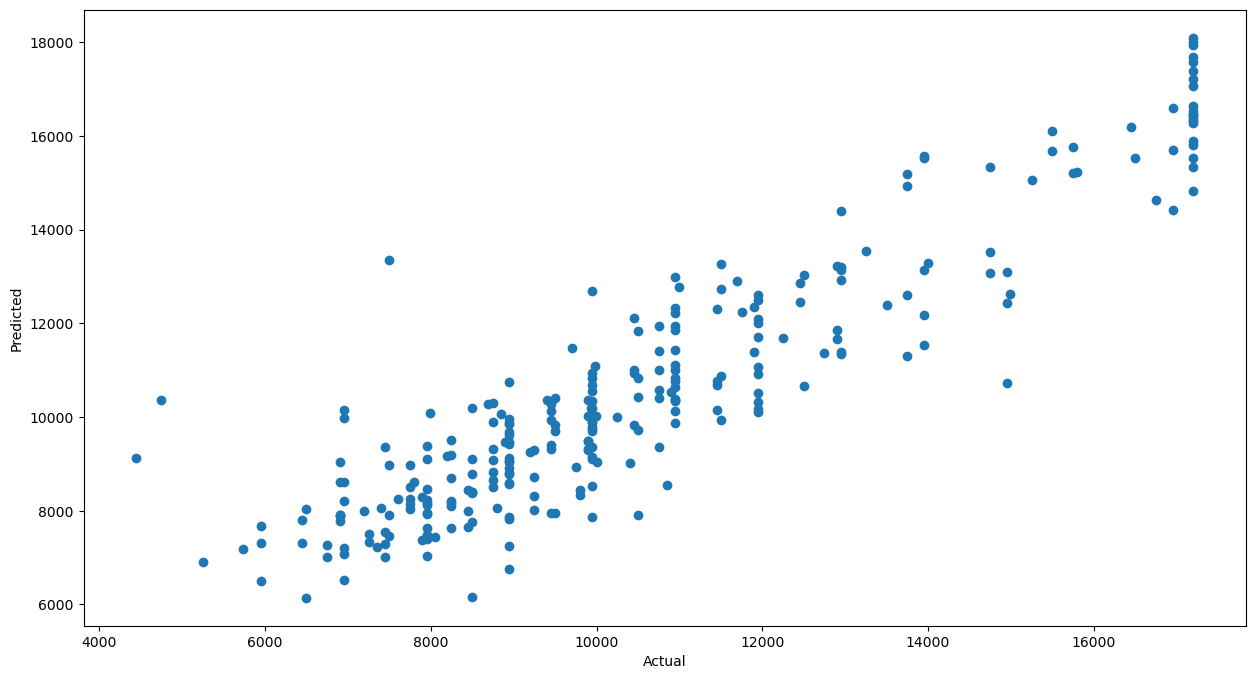

In [268]:
#plot the result for linear regression
plt.figure(figsize=(15,8))
plt.scatter(y_test,predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [270]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rfpredict=rf.predict(x_test)
print("The Random Forest Regressor predicted results are:")
print(rfpredict)

The Random Forest Regressor predicted results are:
[ 9410.5        10105.         12223.2         7843.5
 11484.9        10068.85        6783.5        14949.
 11704.45       10817.9         7846.52       11141.75
 11131.5         9061.          7422.         15004.
 11366.85        8223.9        12074.65        7748.1
  7170.5         7617.75       11400.35       11584.2
 17200.          8174.87       13066.75        7576.
  8993.05        7825.3         9476.05        8387.5
 16231.85        7402.5         9619.55       12467.45
 10520.85       11933.5         9977.95        8963.5
  8841.5         9954.          9814.         16663.97
 10044.13        6726.7         8802.35        8079.5
  8045.95        8284.7        17200.          9520.35
  8481.8         7340.2        11312.45       17196.95
 12088.65       10169.9        17161.22        9738.1
  7411.          8322.8        10371.45       11899.2
 10927.85       13075.05        7951.45        8058.
 17200.         11005.35      

In [258]:
#r score for Random forest regressor
rfscore=r2_score(y_test,rfpredict)
print("The Random Forest Regressor predicted score are:",rfscore)

The Random Forest Regressor predicted score are: 0.851997280133258


In [322]:
#mean_square_error and mean_absolute error for Random Forest regression
from sklearn.metrics import mean_absolute_error,mean_squared_error
rf_mae=mean_absolute_error(y_test,rfpredict)
print("The mean absolute error for Random Forest regression:",rf_mae)
rf_mse=mean_squared_error(y_test,rfpredict)
print("The mean squared error for Random Forest regression:",rf_mse)

The mean absolute error for Random Forest regression: 875.1360069444444
The mean squared error for Random Forest regression: 1360896.7280807483


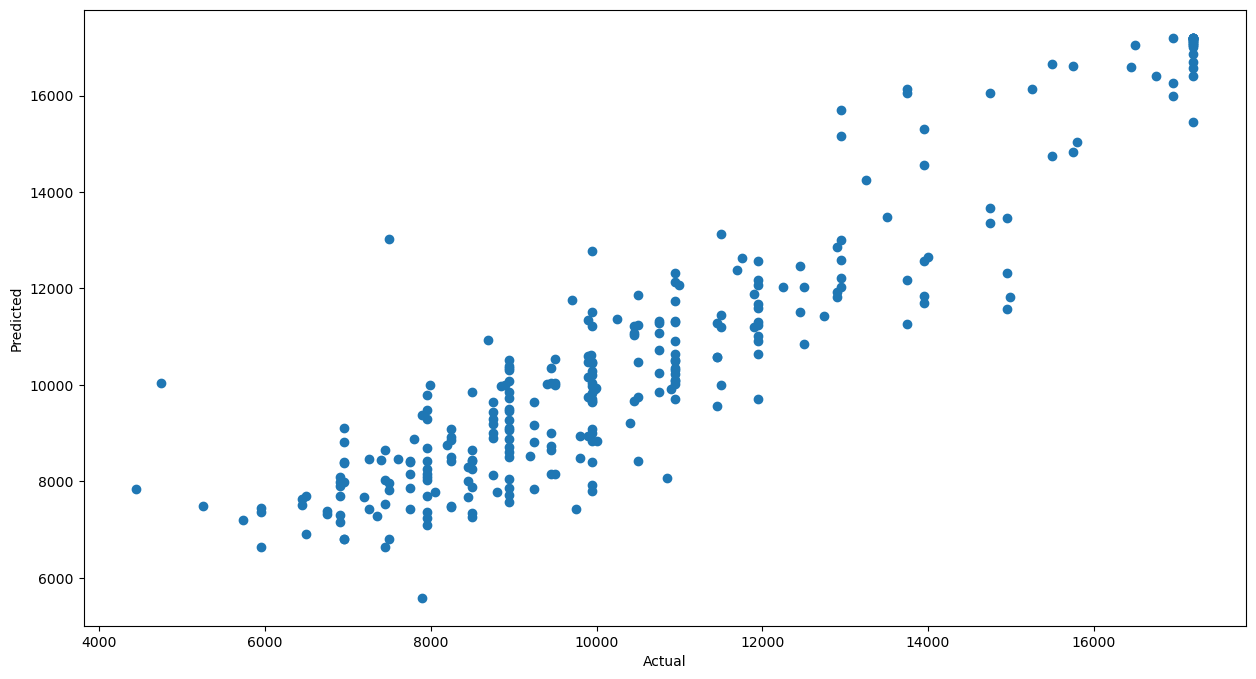

In [180]:
#plot the result for Random Forest Regression
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfpredict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [272]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbrpredict=gbr.predict(x_test)
print("The Gradient Boosting Regressor predicted results are:")
print(gbrpredict)

The Gradient Boosting Regressor predicted results are:
[ 8954.06603432 10506.59196081 12605.54447884  7971.84418627
 10407.47859992  9723.43446137  6925.34956623 15753.68424741
 11304.3873472  10464.05892992  7162.72276434 11001.21903553
 11545.42517885  9470.79227545  7519.64548991 15768.14874734
 11130.41936389  8263.17880584 12349.58304726  8021.4065594
  7118.25556679  7559.13488534 11760.21563416 12124.6260084
 17284.84503414  7959.0702857  13138.86469771  7174.87665579
  9662.73882696  8162.72326243  9836.63114184  8676.65552163
 16659.17879577  7451.12737826 10262.98806305 12206.06470149
  9739.89425946 12293.80658378  9926.92188086  9081.18580416
  9197.50323224  9973.95381776  9408.00761387 16508.19305493
 10283.46607117  7466.19105325  9661.7596617   7971.84418627
  8193.18468607  8412.82496291 17366.12096208  8994.65341363
  7857.14042059  6914.06437462 11182.40605026 17271.59750293
 12697.25488227  9973.95381776 16853.87559023 10332.56012376
  6917.37511063  7839.31115175 1

In [324]:
#r score for Gradient Boosting regressor
gbrscore=r2_score(y_test,gbrpredict)
print("The  Gradient Boosting Regressor predicted score are:",gbrscore)

The  Gradient Boosting Regressor predicted score are: 0.868468854664522


In [326]:
#mean_square_error and mean_absolute error for Gradient Boosting regression
from sklearn.metrics import mean_absolute_error,mean_squared_error
gbr_mae=mean_absolute_error(y_test,gbrpredict)
print("The mean absolute error for Gradient Boosting regression:",gbr_mae)
gbr_mse=mean_squared_error(y_test,gbrpredict)
print("The mean squared error for Gradient Boosting regression:",gbr_mse)

The mean absolute error for Gradient Boosting regression: 815.0635613675972
The mean squared error for Gradient Boosting regression: 1206974.3544877034


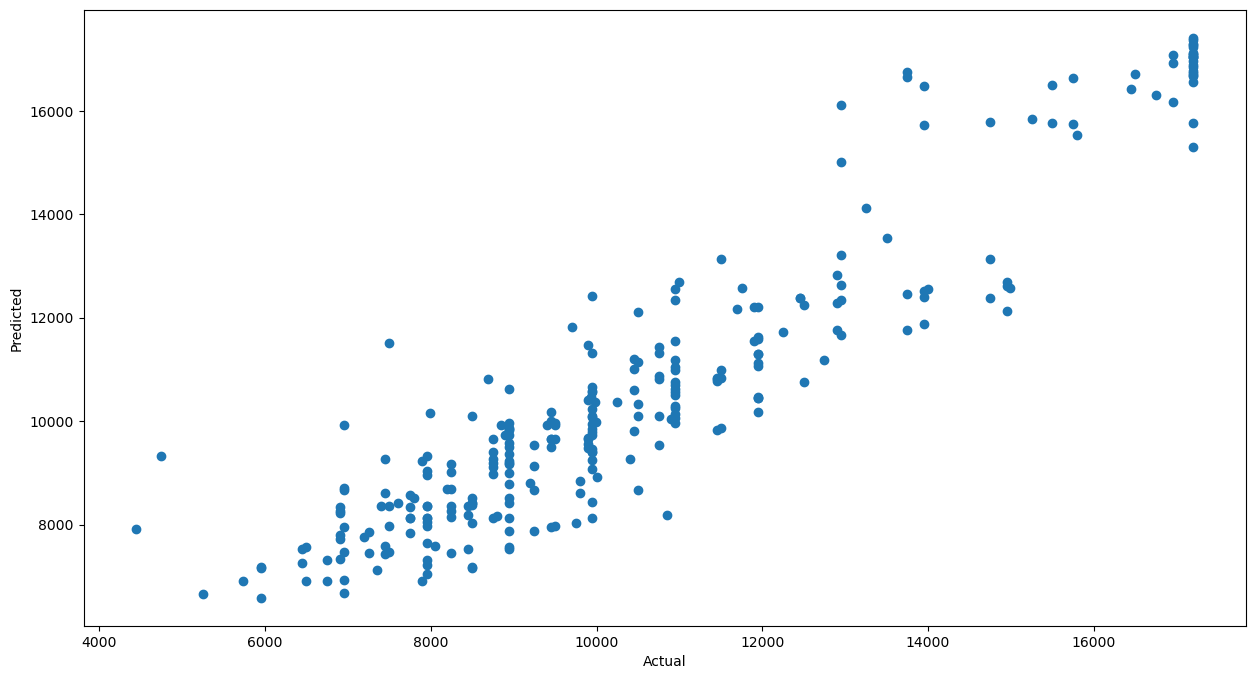

In [328]:
#plot the result for Gradient Boosting Regression
plt.figure(figsize=(15,8))
plt.scatter(y_test,gbrpredict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [330]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
abrpredict=abr.predict(x_test)
print("The  AdaBoosting Regressor predicted results are:")
print(abrpredict)

The  AdaBoosting Regressor predicted results are:
[ 8688.87128713  9745.02362205 12488.09677419  8066.33879781
 10181.34113712  9860.0877193   7619.46808511 15731.24590164
 10513.32167832 10771.83615819  6962.5559322  11603.12227074
 11317.30434783 10181.34113712  7619.46808511 15731.24590164
 10759.5         7923.485623   12349.63855422  7923.485623
  7657.77542373  8066.33879781 11145.26666667 11603.12227074
 16095.32110092  7923.485623   12701.53284672  7628.53379953
  9160.84072581  9160.34782609  9745.02362205  8708.50925926
 15609.40860215  7393.68421053  9097.14957265 12488.09677419
  9390.04273504 12349.63855422  9791.33189655 10182.32984293
  9995.20710059 10028.61986301  9405.28042328 16048.73972603
 11161.7014218   7923.485623   10401.29545455  8066.33879781
  8225.40611354  8688.87128713 16095.32110092  8752.5
  8066.33879781  7657.77542373 10511.83088235 16095.32110092
 12579.60130719  9995.20710059 16048.73972603 11003.82065217
  7152.59649123  7657.77542373 10511.8308823

In [332]:
#r score for  AdaBoosting regressor
abrscore=r2_score(y_test,abrpredict)
print("The AdaBoosting Regressor predicted score are:",abrscore)

The AdaBoosting Regressor predicted score are: 0.845767224569103


In [334]:
#mean_square_error and mean_absolute error for AdaBoosting regression
from sklearn.metrics import mean_absolute_error,mean_squared_error
abr_mae=mean_absolute_error(y_test,abrpredict)
print("The mean absolute error for Ada Boosting regression:",abr_mae)
abr_mse=mean_squared_error(y_test,abrpredict)
print("The mean squared error for AdaBoosting regression:",abr_mse)

The mean absolute error for Ada Boosting regression: 977.681696794381
The mean squared error for AdaBoosting regression: 1415292.203924435


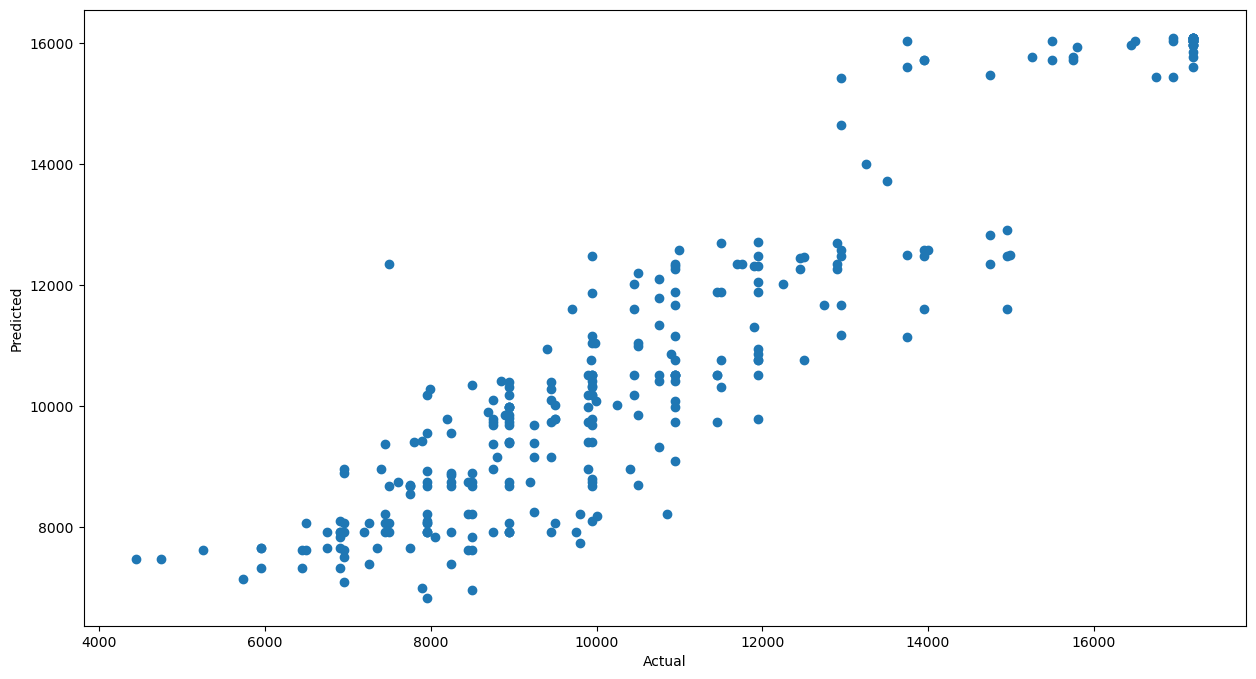

In [336]:
#plot the result for  AdaBoosting Regression
plt.figure(figsize=(15,8))
plt.scatter(y_test,abrpredict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [298]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor()
mlp.fit(x_train,y_train)
mlppredict=mlp.predict(x_test)
print("The Multilayer Regressor predicted results are:")
print(mlppredict)

The Multilayer Regressor predicted results are:
[ 8687.01062965  9316.97788864 13590.0191104  10112.75979081
 10525.48653803 12795.07643535  8860.57526779 12089.85197602
 10588.25156146 10446.41890399  9017.06134389 10473.44300794
 11793.26782804 10825.26526017  8355.02780012 11494.03159891
 10262.0103542  10326.94750536 12196.02671365 10723.88387465
  7076.01038882  6444.25113452 11748.77746382 10373.38989065
 16459.67601789 10507.56726778 15680.90858566  8800.62053502
  9370.61430498  8784.00818301 11889.51353035  9623.40856075
 15044.66210384  8191.50881179 10846.00740914 12900.45063386
 11632.15426221 10646.35201892 10204.2986365   9548.89714513
  9232.8111277  10286.50460816 10319.59833302 12303.81029825
  9904.07705169  8362.83011705 11715.39108992  9960.11163434
 12322.34862522 10139.68842171 16336.24174635  8617.37674748
  9789.79771035  7315.53244932 13400.09867003 15167.44614607
 13366.36921433 10219.99318274 14098.0969975  11817.26870095
  7459.95379698  8905.65942536 11155.

In [300]:
#r score for  mlpregressor
mlpscore=r2_score(y_test,mlppredict)
print("The MLPRegressor predicted score are:",mlpscore)

The MLPRegressor predicted score are: 0.5471216421389884


In [338]:
#mean_square_error and mean_absolute error for MLPregression
from sklearn.metrics import mean_absolute_error,mean_squared_error
mlp_mae=mean_absolute_error(y_test,mlppredict)
print("The mean absolute error for  MLPregression:",mlp_mae)
mlp_mse=mean_squared_error(y_test,mlppredict)
print("The mean squared error for MLPregression:",mlp_mse)

The mean absolute error for  MLPregression: 1598.757869385304
The mean squared error for MLPregression: 4155765.2542793397


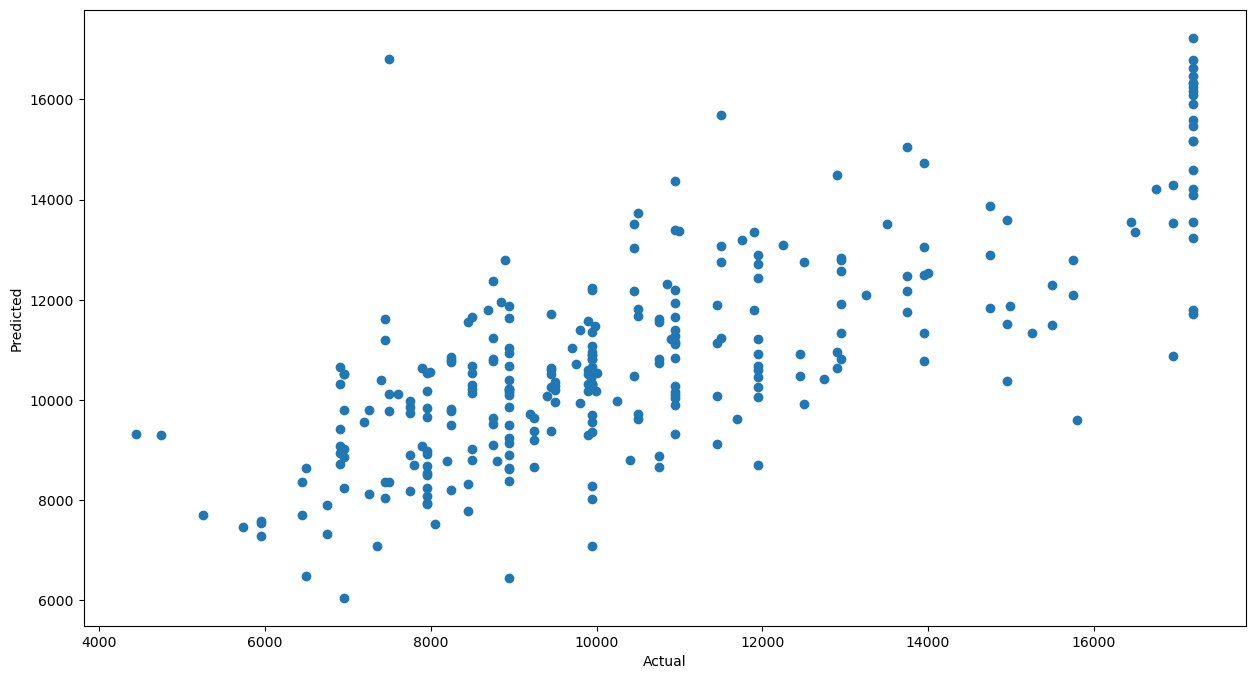

In [304]:
#plot the result for MLP Regression
plt.figure(figsize=(15,8))
plt.scatter(y_test,mlppredict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [276]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(x_train,y_train)
rdpredict=rd.predict(x_test)
print("The Ridge Regressor predicted results are:")
print(rdpredict)

The Ridge Regressor predicted results are:
[ 9410.5        10105.         12223.2         7843.5
 11484.9        10068.85        6783.5        14949.
 11704.45       10817.9         7846.52       11141.75
 11131.5         9061.          7422.         15004.
 11366.85        8223.9        12074.65        7748.1
  7170.5         7617.75       11400.35       11584.2
 17200.          8174.87       13066.75        7576.
  8993.05        7825.3         9476.05        8387.5
 16231.85        7402.5         9619.55       12467.45
 10520.85       11933.5         9977.95        8963.5
  8841.5         9954.          9814.         16663.97
 10044.13        6726.7         8802.35        8079.5
  8045.95        8284.7        17200.          9520.35
  8481.8         7340.2        11312.45       17196.95
 12088.65       10169.9        17161.22        9738.1
  7411.          8322.8        10371.45       11899.2
 10927.85       13075.05        7951.45        8058.
 17200.         11005.35       10523.7

In [306]:
#r score for  Ridge regressor
rdscore=r2_score(y_test,rdpredict)
print("The Ridge Regressor predicted score are:",rdscore)

The Ridge Regressor predicted score are: 0.8516950218020651


In [340]:
#mean_square_error and mean_absolute error for Ridge regression
from sklearn.metrics import mean_absolute_error,mean_squared_error
rd_mae=mean_absolute_error(y_test,rdpredict)
print("The mean absolute error for Ridge regression:",rd_mae)
rd_mse=mean_squared_error(y_test,rdpredict)
print("The mean squared error for Ridge regression:",rd_mse)

The mean absolute error for Ridge regression: 875.1360069444444
The mean squared error for Ridge regression: 1360896.7280807483


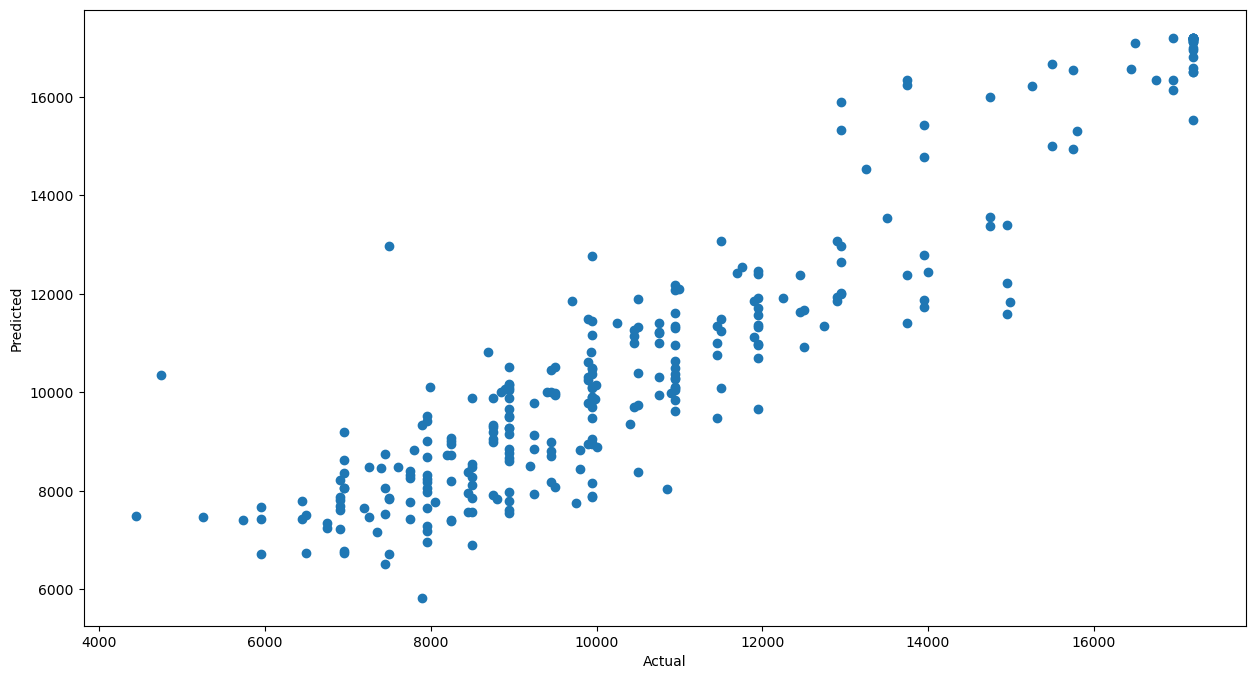

In [310]:
#plot the result for Ridge Regression
plt.figure(figsize=(15,8))
plt.scatter(y_test,rdpredict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [312]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train,y_train)
lspredict=ls.predict(x_test)
print("The lasso Regressor predicted results are:")
print(lspredict)

The lasso Regressor predicted results are:
[ 8464.154967   10383.69306552 12430.37318379  7904.68625648
 10356.95950382  9477.25746661  6523.97259123 15756.46350066
 11064.63574466 10203.46870336  7762.17766251 10944.46361898
 11398.35148413  9696.07588194  7801.86041741 15674.357468
 10916.65192391  7896.01991772 12322.46292236  8942.06043884
  7229.60649278  6756.70469472 11296.83639959 10796.21060526
 17939.99479832  7954.96023606 13282.009112    6170.91316371
  9310.85736086  8054.18831966 10159.34395503  7911.74523298
 14918.42528888  7630.67032302 10369.0005506  12496.45052244
  9437.49624474 11849.31202121  9834.86576785  9095.30210629
  8797.00384286 10401.42922149  9358.5525584  16103.74144534
 10836.71984029  7449.3289947   9406.82144025  7945.43518606
  8545.90730949  8784.95191315 17587.58243805  8565.10625744
  7339.39079513  7010.55191283 11116.41337684 17227.86080594
 12772.69933363  9959.08050079 18002.27044064 10823.42879011
  7170.1364323   8132.76167756 10764.6718511

In [342]:
#r score for  Lasso regressor
lsscore=r2_score(y_test,lspredict)
print("The Lasso Regressor predicted score are:",lsscore)

The Lasso Regressor predicted score are: 0.8384552234771201


In [344]:
#mean_square_error and mean_absolute error for Lasso regression
from sklearn.metrics import mean_absolute_error,mean_squared_error
ls_mae=mean_absolute_error(y_test,lspredict)
print("The mean absolute error for lasso regression:",ls_mae)
ls_mse=mean_squared_error(y_test,lspredict)
print("The mean squared error for lasso regression:",ls_mse)

The mean absolute error for lasso regression: 896.490310339982
The mean squared error for lasso regression: 1482389.603369256


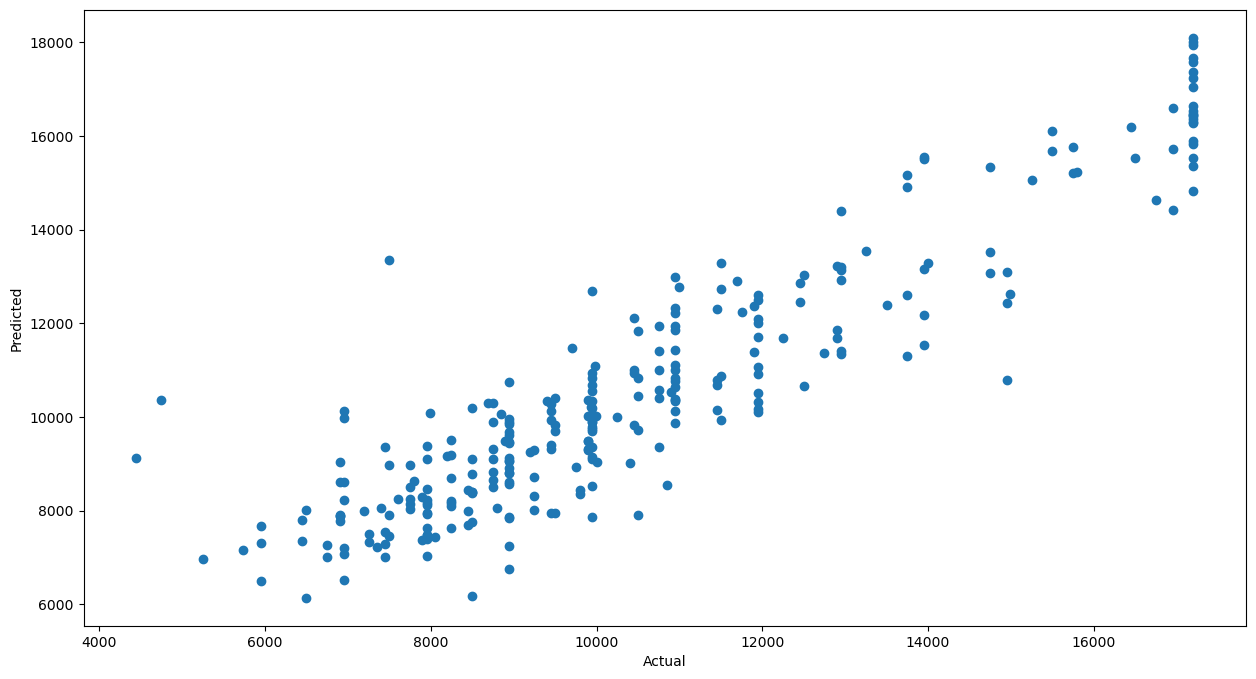

In [346]:
#plot the result for Ridge Regression
plt.figure(figsize=(15,8))
plt.scatter(y_test,lspredict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()